**Data Analytics**
**Programming Assignment 2**

**Name:** Rykelle Wei Ruelan  
**Name:** James Matthew Garcia  
**Course & Year:** BS Computer Science 2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from fpdf import FPDF
from PIL import Image

In [15]:
import plotly.io as pio
pio.renderers.default = "jupyterlab"



## **Bar Graph:**

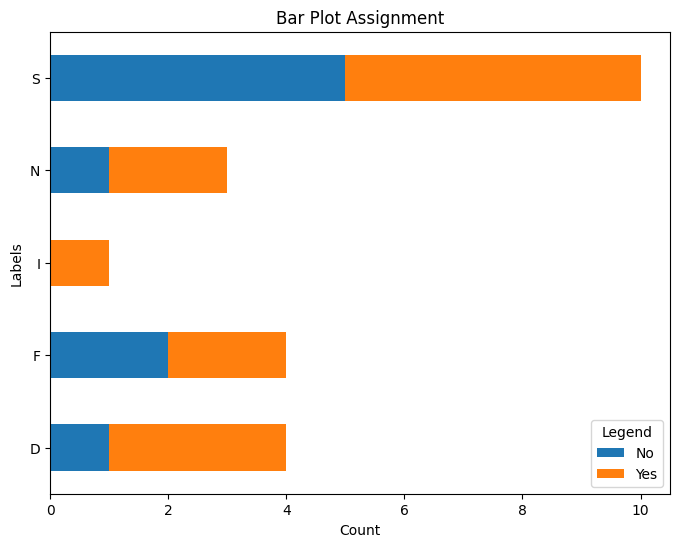

In [16]:
# Load and process the bar plot data
bar_df = pd.read_csv("bar_assignment.csv")
bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})
bar_pivot = bar_df.groupby("LABEL")["COUNT"].value_counts().unstack(fill_value=0)

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_pivot.plot(kind="barh", stacked=True, ax=ax, color=["#1f77b4", "#ff7f0e"])
ax.set_xlabel("Count")
ax.set_ylabel("Labels")
ax.set_title("Bar Plot Assignment")
ax.legend(title="Legend", labels=["No", "Yes"])
plt.savefig("bar_chart.png")

plt.show()
plt.close()

## **Sankey Diagram:**

In [16]:
sankey_df = pd.read_csv("sankey_assignment.csv")
source_categories = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
target_categories = ['Reg', 'Aca', 'Oth']
sankey_melted = sankey_df.melt(id_vars=["LABEL"], value_vars=source_categories + target_categories,
                                var_name="Source", value_name="Value")
sankey_melted = sankey_melted[sankey_melted["Value"] > 0]
nodes = list(sankey_melted["Source"].unique()) + list(sankey_melted["LABEL"].unique())
node_dict = {node: i for i, node in enumerate(nodes)}
sankey_melted["SourceIndex"] = sankey_melted["Source"].map(node_dict)
sankey_melted["TargetIndex"] = sankey_melted["LABEL"].map(node_dict)
fig = go.Figure(go.Sankey(node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes),
                          link=dict(source=sankey_melted["SourceIndex"], target=sankey_melted["TargetIndex"], value=sankey_melted["Value"])))
fig.show()
fig.write_image("sankey_diagram.png")

## **Network Graph:**

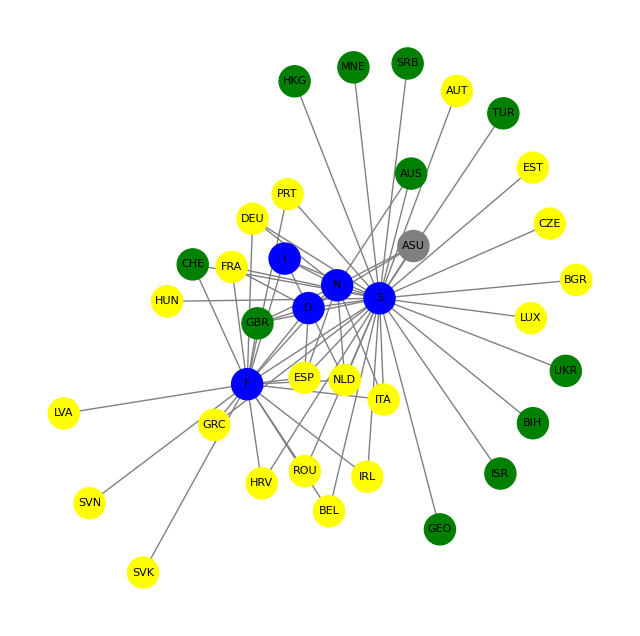

In [18]:
# Load and process the network data
network_df = pd.read_csv("networks_assignment.csv")
G = nx.Graph()
pentagram_nodes = ['D', 'F', 'I', 'N', 'S']
node_colors = {node: "blue" for node in pentagram_nodes}
node_colors.update({node: "green" for node in ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']})
node_colors.update({node: "yellow" for node in ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']})
for _, row in network_df.iterrows():
    node = row['LABELS']
    connections = row.drop("LABELS")[row.drop("LABELS") > 0].index.tolist()
    for connection in connections:
        G.add_edge(node, connection)
for node in G.nodes():
    if node not in node_colors:
        node_colors[node] = "gray"
pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], edge_color="gray", node_size=500, font_size=8)
plt.savefig("network_graph.png")
plt.show()
plt.close()